# <center>Data Science 2 - Assignment 2<center>
    
<center>Created by Zsófia Rebeka Katona<center>

---

### Assignment 2
#### 1.1 General information
You are required to submit two files to Moodle: an .ipynb file and the rendered .pdf file with
your solutions. Do not zip them together so I will be able to annotate the .pdf directly.
Please give short (2-3 sentences) interpretations / explanations to your answers, not only the
program code and outputs. Be concise and focused (less could be more ;)).
Grades will be distributed with the following rule: from the points you earn, you get 100% if you
submit until the due date (2024-04-05 20:00), 50% within 24 hours past due date, and 0% after
that.


#### 1.2 Classify fashion images on the MNIST data (20 points)
Take the alternative version of the famous “MNIST dataset”, which consists of images of Zalando’s
articles. Your task is to correctly classify the images into one of the ten categories, such as dress
or shirt. The images are in exactly the same format as we saw for the handwritten digits: 28x28
pixel grayscale images. The task is to build deep neural network models to predict the items. You
can use either sklearn or keras; to get the data, go to the corresponding Kaggle page or use
the fashion_mnist.load_data() function from the keras.datasets module. Make sure you split
the training set into two sets: one for training your models on and one for validation and model
selection. You can work with a relatively small train set if you have computational problems.

### What would be an appropriate metric to evaluate your models? Why? (Hint: No code required.) (2 points)
---
There are several ways to evaluate predictive models. However, the most appropriate metric could be using accuracy. Accuracy is important, as it shows the level of reliability and effectiveness of the predictive models. If we obtain a validation set during data splitting, we could also use validation accuracy, which tells us how well the models generalize to unseen data. Accuracy serves as a good indicator in predictive modeling, because it provides a clear indication of the model's ability to correctly classify instances, especially where the cost of misclassification is high.

### Get the data and show some example images from the data. (2 points) 

In [68]:
# Importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.datasets import fashion_mnist
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Rescaling
from keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras.models import Model

In [2]:
# Loading the MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Converting the output to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Splitting the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=20240405)

print(f"Size of training sets: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Size of validation sets: X_val:   {X_val.shape}, y_val:   {y_val.shape}")
print(f"Size of test sets: X_test:  {X_test.shape}, y_test:  {y_test.shape}")

Size of training sets: X_train: (48000, 28, 28), y_train: (48000, 10)
Size of validation sets: X_val:   (12000, 28, 28), y_val:   (12000, 10)
Size of test sets: X_test:  (10000, 28, 28), y_test:  (10000, 10)


Training images:


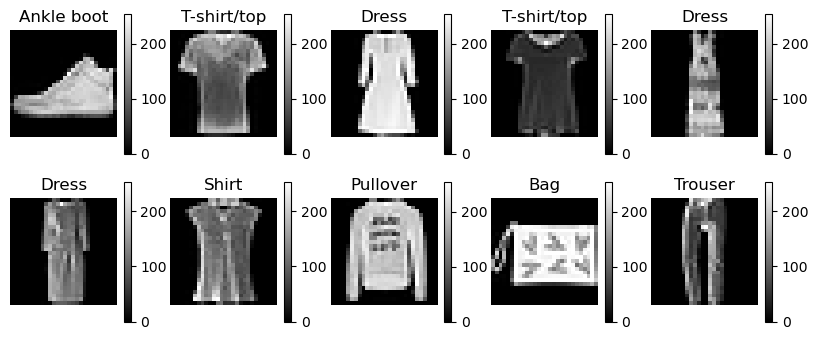

Validation images:


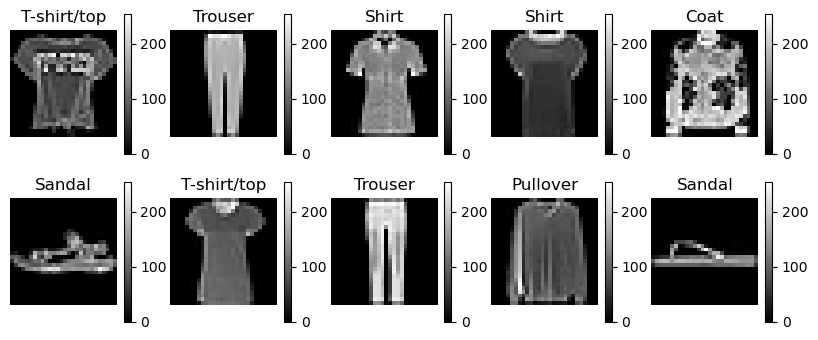

Test images:


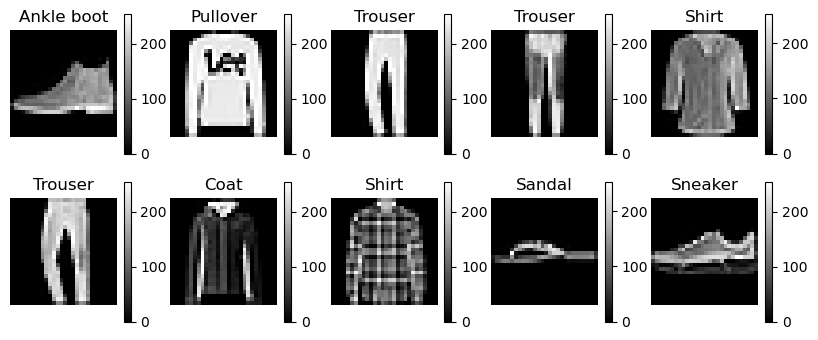

In [3]:
# Defining class names for the labels
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Labelling the items with the clothing names
clothing_labels = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}

# Creating a list of datasets and their corresponding titles
datasets = [(X_train, y_train, "Training Images"), (X_val, y_val, "Validation Images"), (X_test, y_test, "Test Images")]

# Iterating over the training, validation and test datasets
def show_images(images, labels, nrows = 1, ncols = 5, class_names = None):
    """"Display the images and their labels"""
    plt.figure(figsize = (10, 2 * nrows))
    for i in range(nrows * ncols):
        plt.subplot(nrows, ncols, i + 1)
        plt.imshow(images[i], cmap = "gray")
        plt.colorbar()
        if class_names is not None:
            plt.title(class_names[np.argmax(labels[i])])
        else:
            plt.title(np.argmax(labels[i]))
        plt.axis('off')
    plt.show()

# Printing the images
print("Training images:")
show_images(X_train, y_train, nrows = 2, ncols = 5, class_names = class_names)

print("Validation images:")
show_images(X_val, y_val, nrows = 2, ncols = 5, class_names = class_names)

print("Test images:")
show_images(X_test, y_test, nrows = 2, ncols = 5, class_names = class_names)

### Train a simple fully connected single hidden layer network to predict the items. Remember to normalize the data similar to what we did in class. Make sure that you use enough epochs so that the validation error begins to level off - provide a plot of the training history. (2 points) 

In [4]:
# Building a simple fully connected hidden layer network
model = Sequential([
    Rescaling(1./255, input_shape = (28, 28, 1)),
    Flatten(), 
    Dense(256, activation='relu'), 
    Dense(10, activation='softmax')
])

# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Printing the model summary
print(model.summary())

C:\Users\Zsófi\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 203,530 (795.04 KB)

 Trainable params: 203,530 (795.04 KB)

 Non-trainable params: 0 (0.00 B)

None


Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7775 - loss: 0.6436 - val_accuracy: 0.8536 - val_loss: 0.3994
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8612 - loss: 0.3864 - val_accuracy: 0.8598 - val_loss: 0.3861
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8767 - loss: 0.3384 - val_accuracy: 0.8616 - val_loss: 0.3767
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8840 - loss: 0.3200 - val_accuracy: 0.8784 - val_loss: 0.3295
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8895 - loss: 0.2967 - val_accuracy: 0.8848 - val_loss: 0.3266
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8982 - loss: 0.2764 - val_accuracy: 0.8827 - val_loss: 0.3150
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9026 - loss: 0.2577 - val_accuracy: 0.8799 - val_loss: 0.3285
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9074 - loss: 0.2483 - 

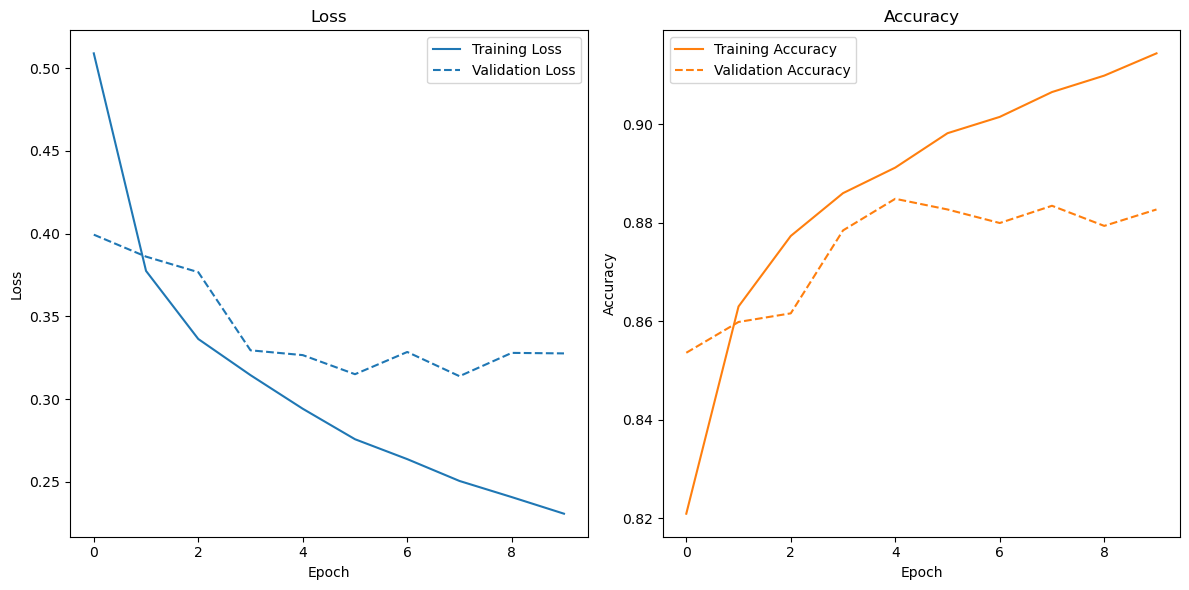

In [5]:
# Defining early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Training the model
history = model.fit(X_train, y_train, epochs=25, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Defining a function to plot history
def plot_history(history):
    """
    Plot training and validation loss, and accuracy for the given history.

    Args:
    - history: History object returned by the model.fit() method.

    Returns:
    - None
    """
    color_palette = ['#1f77b4', '#ff7f0e']
    plt.figure(figsize=(12, 6))

    # Plotting the training and validation loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss', color=color_palette[0])
    plt.plot(history.history['val_loss'], label='Validation Loss', color=color_palette[0], linestyle='--')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss')

    # Plotting the training and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy', color=color_palette[1])
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color=color_palette[1], linestyle='--')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy')

    plt.tight_layout()
    plt.show()

# Plotting the loss and accuracy scores for the training and validation sets
plot_history(history)

The plot illustrates that the training loss in the first model is consistently decreasing. Initially, both the training and valudation loss decrease steadily, indicating that the model is learning and improving its performance on both the training and validation datasets. Around the 4th epoch the validation loss starts to level off, suggesting that the model's improvement on the validation data is slowing down. This suggests that the model starts to overfit to the training data. Despite the validation loss leveling off, the training loss continues to decrease, showing that the model is still learning from the training data. While the training accuracy continues to increase over the epochs, as of the 4th epoch, the validation accuracy remains around 0.88.

Due to the EarlyStopping, the model stops at the 17th epoch, when the validation accuary reaches 0.93, indicating that the model's performance on validation model has reached its peak. Despite the potential for overfitting, the model achieves a relatively good validation acuracy of 0.89. This indicates that the model generalizes well to unseen data and performs effectively in classifying the items in the fashion MNIST dataset.

### Experiment with different network architectures and settings (number of hidden layers, number of nodes, regularization, etc.). Train at least 3 models. Explain what you have tried and how it worked. (6 points) 

### Second model: Adding the Dropout
---

In [6]:
# Setting the network
model_2 = Sequential([
    Rescaling(1./255, input_shape = (28, 28, 1)),
    Flatten(), 
    Dense(256, activation='relu'),
    # Adding a Dropout of 0.5
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compiling the model
model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_2.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 203,530 (795.04 KB)

 Trainable params: 203,530 (795.04 KB)

 Non-trainable params: 0 (0.00 B)

None


Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7338 - loss: 0.7479 - val_accuracy: 0.8498 - val_loss: 0.4140
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8291 - loss: 0.4727 - val_accuracy: 0.8517 - val_loss: 0.3995
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8474 - loss: 0.4242 - val_accuracy: 0.8618 - val_loss: 0.3673
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8515 - loss: 0.4089 - val_accuracy: 0.8725 - val_loss: 0.3510
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8575 - loss: 0.3920 - val_accuracy: 0.8632 - val_loss: 0.3686
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8621 - loss: 0.3778 - val_accuracy: 0.8738 - val_loss: 0.3437
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8654 - loss: 0.3653 - val_accuracy: 0.8749 - val_loss: 0.3363
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8665 - loss: 0.3623 - 

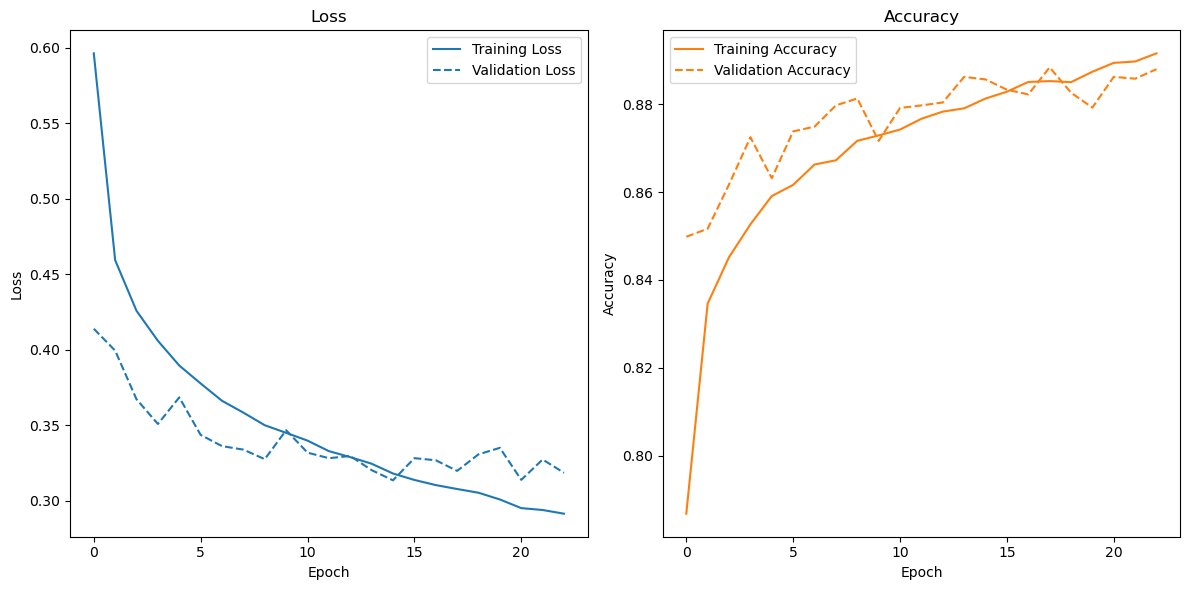

In [7]:
# Defining early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Training the model
history_2 = model_2.fit(X_train, y_train, epochs=25, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Plotting the loss and accuracy scores for the training and validation sets
plot_history(history_2)

By adding a 0.5 Dropout layer, both the training and validation loss decreased. This indicates that the Dropot regulated the model and prevented it from overfitting. Dropout randomly sets a fraction of input units to 0 at each update during training, which can prevent the model from relying too heavily on any individual feature or combination of features. The fluctuatiation in the validation loss after the 4th epoch likely to show that the model is adjusting to the dropout regularization and finding a better balance between fitting the training data and regularizing and finding a better balance between fitting the training data and generalizing to unseen validation data. Both in the case of training and validation set, the 0.88 accuracy scores indicate that the model correctly classified 88% of the training and validation examples, while the losses of 0.32 suggest that the model's predictions were relatively close to the actual values in the training dataset. Unlike the other models, the validation accuracy is predominantly higher than the training accuracy. Overall, the model seems to be regularized well, as evidenced by the improvement in both training and validation loss. The similar scores suggest that the model is not overfitting and is performing consistently on both datasets. Due to EarlyStopping, the model stops at the 13th epoch, where it reaches an accuracy of 0.8745 and a validation accuracy of 0.88, indicating the point where the model has reached its peak. 

### Third model: Increasing the number of nodes in the hidden layer
---

In [8]:
# Setting the network
model_3 = Sequential([
    Rescaling(1./255, input_shape = (28, 28, 1)),
    Flatten(), 
    # Increasing the number of nodes from 256 to 512
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

# Compiling the third model
model_3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_3.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)              │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

None


Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7816 - loss: 0.6169 - val_accuracy: 0.8593 - val_loss: 0.3822
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8621 - loss: 0.3789 - val_accuracy: 0.8744 - val_loss: 0.3489
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8778 - loss: 0.3343 - val_accuracy: 0.8725 - val_loss: 0.3498
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8889 - loss: 0.3033 - val_accuracy: 0.8786 - val_loss: 0.3317
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8943 - loss: 0.2830 - val_accuracy: 0.8834 - val_loss: 0.3103
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9036 - loss: 0.2647 - val_accuracy: 0.8839 - val_loss: 0.3140
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9030 - loss: 0.2557 - val_accuracy: 0.8862 - val_loss: 0.3175
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9112 - loss: 0.2380 -

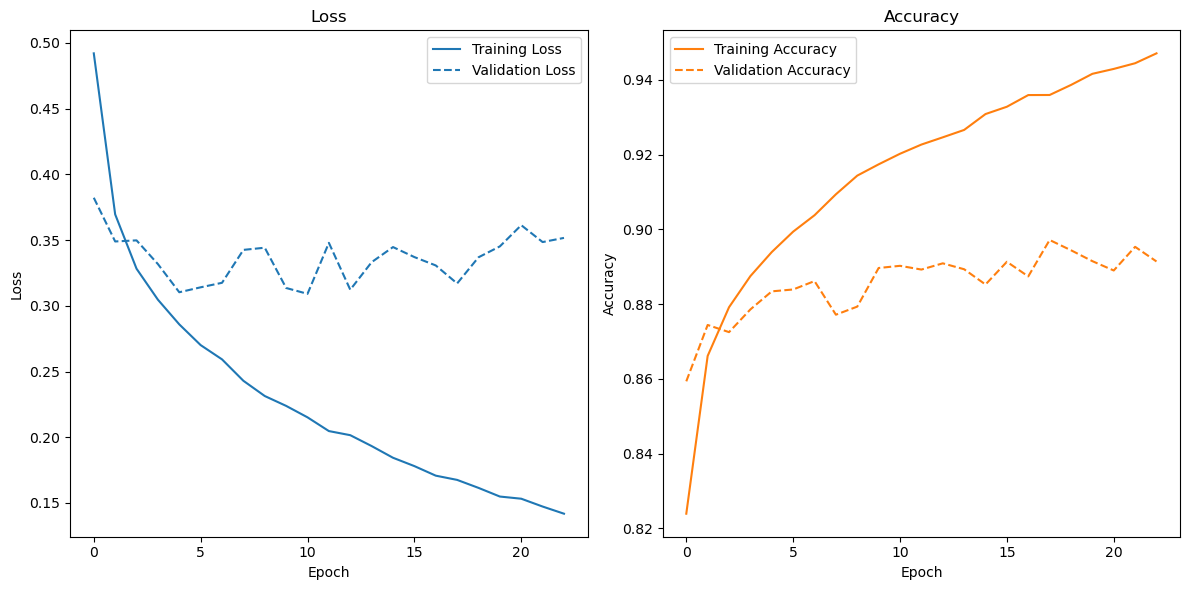

In [9]:
# Defining early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Training the model
history_3 = model_3.fit(X_train, y_train, epochs=25, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Plotting the loss and accuracy scores for the training and validation sets
plot_history(history_3)

The third model exhibits a similar behaviour to the first model, where the training loss gradually decreases and the validation loss levels off around the 4th epoch. However, unlike the first model, the validation loss does not decrease along the training loss but it begins to level off when the loss reaches 0.33, indicating where the model's improvement on the validation data is slowing down. This suggests that by adding double the amount of nodes to the first hidden layer, the model may have become too complex, leading to overfitting. This increased complexity allows the model to capture more intricate patterns in the training data but may also result in memorization of noise, which hinders its performance on unseen data. The EarlyStopping callback is triggered around the 18th epoch, however, it doesn't entirely eliminate oversitting, especially in cases where the model architecure is too compley or when there is insufficient regularization. The accuracy at the 18th epoch reaches 0.94 and the validation accuracy stops at 0.88, similar to the previous models. However, the final training loss decreases further (0.15) than the loss in the previous models.  

### Fourth model: Increasing the number of layers with a sigmoid activation function and the same number of nodes
---

In [10]:
# Setting the network
model_4 = Sequential([
    Rescaling(1./255, input_shape = (28, 28, 1)),
    Flatten(), 
    Dense(256, activation='relu'),
    # Adding another hidden layer with a sigmoid activation function
    Dense(256, activation = 'sigmoid'),
    Dense(10, activation='softmax')
])

# Compiling the model
model_4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_4.summary())

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_3 (Rescaling)              │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 269,322 (1.03 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

None


Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7589 - loss: 0.6683 - val_accuracy: 0.8463 - val_loss: 0.4070
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8643 - loss: 0.3677 - val_accuracy: 0.8614 - val_loss: 0.3688
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8786 - loss: 0.3283 - val_accuracy: 0.8689 - val_loss: 0.3639
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8874 - loss: 0.3009 - val_accuracy: 0.8795 - val_loss: 0.3242
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8973 - loss: 0.2755 - val_accuracy: 0.8679 - val_loss: 0.3676
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8967 - loss: 0.2721 - val_accuracy: 0.8816 - val_loss: 0.3145
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9084 - loss: 0.2471 - val_accuracy: 0.8810 - val_loss: 0.3189
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9121 - loss: 0.2343 -

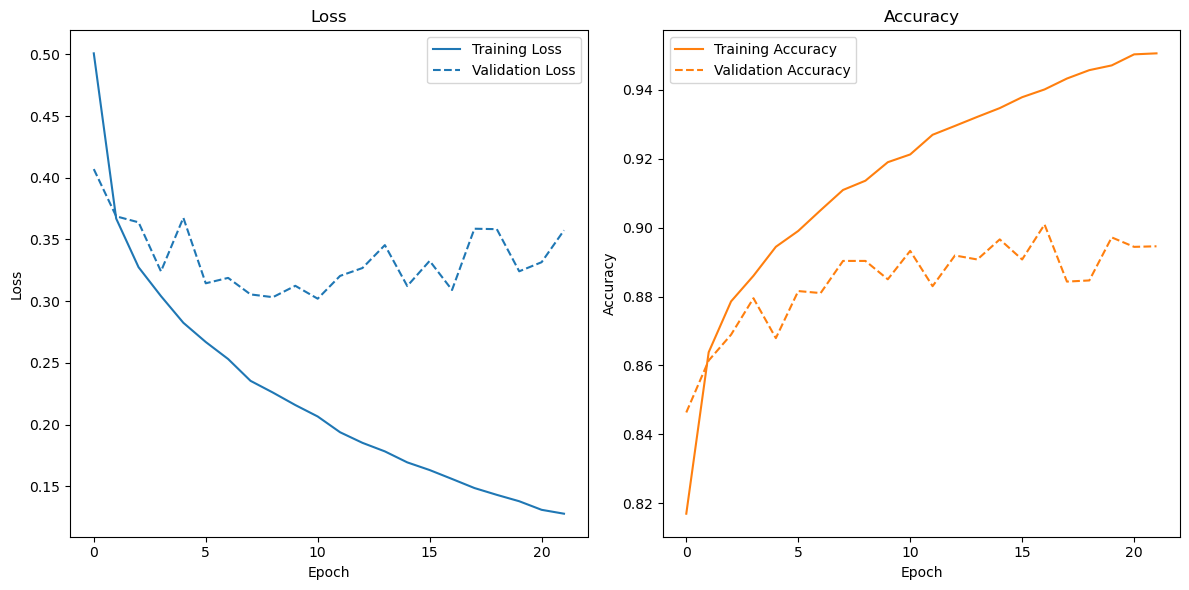

In [11]:
# Defining early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Training the model
history_4 = model_4.fit(X_train, y_train, epochs=25, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Plotting the loss and accuracy scores for the training and validation sets
plot_history(history_4)

The fourth model obtains two hidden layers, one with a relu and the other with a sigmoid activation function, each containing 256 nodes. The fourth model exhibits a similar behaviour to the first and the third model. The training loss gradually increases, while the validation loss levels off around the 5th epoch, showing the model's improvement slowing down on the validation data. This indicates that by adding another layer with the sigmoid activation function does not improve the model's performance. Moreover, it makes the model architecture too complex, leading to overfitting. Despite achieving a high training accuracy score of 0.96, and the lowest training loss among the networks without convolution (0.1108), the validation loss score is 0.3361. This serves as another reason that the extra layer leads to overfitting, as evidenced by the disparity between the training and the validation performance. The EarlyStopping is only triggered at the 24th epoch, which is considerably later than the previous models. This suggests that the model required more iterations to find its peak.

### Fifth model: Combining the previous additions
#### Increasing the number of nodes, adding a dropout, another hidden layer and a learning rate to adam
---

In [12]:
# Setting the network
model_5 = Sequential([
    Rescaling(1./255, input_shape = (28, 28, 1)),
    Flatten(), 
    # Doubling the number of nodes with ReLU activation function
    Dense(512, activation='relu'),
    # Adding another layer with the sigmoid function
    Dense(256, activation = 'sigmoid'),
    # Adding a Dropout of 0.5
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Setting the learning rate for the adam optimizer
adam_optimizer = Adam(learning_rate=0.001)

# Compiling the model
model_5.compile(optimizer=adam_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
print(model_5.summary())

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_4 (Rescaling)              │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

None


Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7400 - loss: 0.7189 - val_accuracy: 0.8485 - val_loss: 0.4083
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8566 - loss: 0.3919 - val_accuracy: 0.8689 - val_loss: 0.3537
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8744 - loss: 0.3427 - val_accuracy: 0.8702 - val_loss: 0.3491
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8788 - loss: 0.3267 - val_accuracy: 0.8697 - val_loss: 0.3431
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8909 - loss: 0.2953 - val_accuracy: 0.8773 - val_loss: 0.3243
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8950 - loss: 0.2791 - val_accuracy: 0.8844 - val_loss: 0.3060
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8994 - loss: 0.2671 - val_accuracy: 0.8859 - val_loss: 0.3129
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9045 - loss: 0

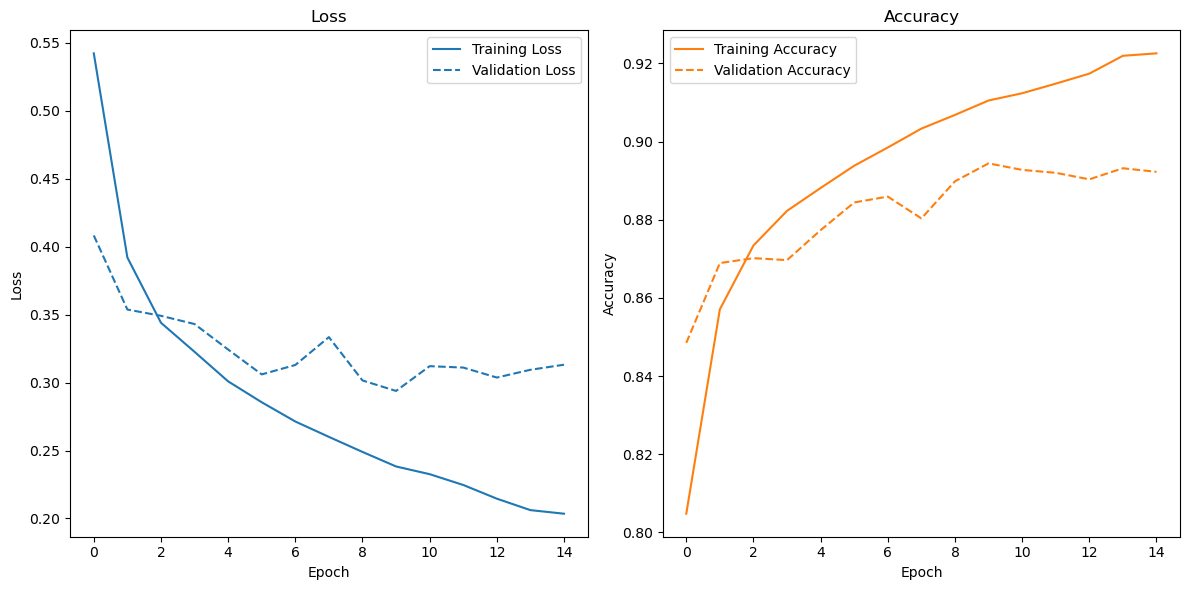

In [13]:
# Defining early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Training the model
history_5 = model_5.fit(X_train, y_train, epochs=25, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Plotting the loss and accuracy scores for the training and validation sets
plot_history(history_5)

According to the plot and the accuracy scores, combining all the previous models' features doesn't improve the model significantly. The model with the highest accuracy (0.95) was due to adding another hidden layer with the sigmoid function, but in this model the training accuracy only reaches 0.94. The plot exhibits a similar trend in terms of training and validaiton loss. The validation loss begins to level off after the 5th epoch, however it doesn't as much as in the previous models. The EarlyStopping is not activated, suggesting that the model may benefit from further regularization techniques or architectural adjustments to prevent overfitting and improve generalization performance. 

### (6 points) Try to improve the accuracy of your model by using convolution. Train at least two different models (you can vary the number of convolutional and pooling layers or whether you include a fully connected layer before the output, etc.).

### 6th model: Increased depth
---

In [14]:
# Setting the network
model_6 = Sequential([
    Rescaling(1./255, input_shape=(28, 28, 1)),
    # Convolutional layer with 32 filters and a 3x3 kernel size
    Conv2D(32, (3, 3), activation='relu'),
    # Max pooling layer with a 2x2 pool size
    MaxPooling2D((2, 2)),
    # Convolutional layer with 64 filters and a 3x3 kernel size
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    # Convolutional layer with 128 filters and a 3x3 kernel size,
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    # Dense (fully connected) layer with 128 neurons
    Dense(128, activation='relu'),
    # Dropout layer of 0.5 to reduce overfitting
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compiling the model
model_6.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_6.summary())

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_5 (Rescaling)              │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 241,546 (943.54 KB)

 Trainable params: 241,546 (943.54 KB)

 Non-trainable params: 0 (0.00 B)

None


Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.7021 - loss: 0.8252 - val_accuracy: 0.8673 - val_loss: 0.3551
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.8681 - loss: 0.3743 - val_accuracy: 0.8772 - val_loss: 0.3270
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.8845 - loss: 0.3250 - val_accuracy: 0.8930 - val_loss: 0.2865
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.9010 - loss: 0.2773 - val_accuracy: 0.8979 - val_loss: 0.2727
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9071 - loss: 0.2535 - val_accuracy: 0.9097 - val_loss: 0.2435
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.9156 - loss: 0.2274 - val_accuracy: 0.9097 - val_loss: 0.2448
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.9249 - loss: 0.2070 - val_accuracy: 0.9119 - val_loss: 0.2426
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 14ms/step - accuracy: 0.9294 -

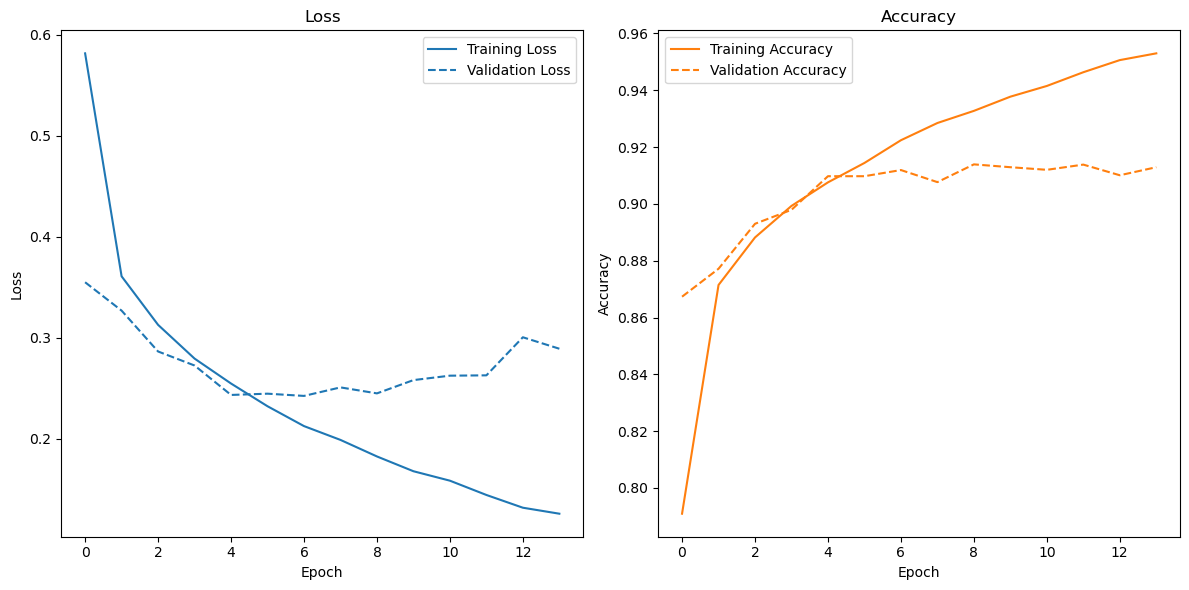

In [15]:
# Defining early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Training the model
history_6 = model_6.fit(X_train, y_train, epochs=25, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Plotting the loss and accuracy scores for the training and validation sets
plot_history(history_6)

The model consists of three convolutional layers followed by max pooling layers to extract features, followed by a flatten layer to convert the 2D feature maps into a vector. It then includes a dense layer with 128 neurons and a ReLU activation function, along with a dropout layer to mitigate overfitting.

Despite the training loss decreasing, the validation loss begins to increase after the 5th epoch, indicating potential overfitting. This model obtains the lowest training loss with a score of 0.0828. The Early Stopping callback is triggered at the 21st epoch to prevent further overfitting. The model achieves a high training accuracy of 96.83% and a validation accuracy of 91.18%, indicating good generalization performance. However, despite the good accuracy scores and the EarlyStopping mechanism, the model is still overfitting.

### 7th model: Increased Width
---

In [16]:
# Setting the network
model_7 = Sequential([
    Rescaling(1./255, input_shape=(28, 28, 1)),
    # Convolutional layer with 32 filters and a 3x3 kernel size
    Conv2D(32, (3, 3), activation='relu'),
    # Max pooling layer with a 2x2 pool size
    MaxPooling2D((2, 2)),
    # Convolutional layer with 64 filters and a 3x3 kernel size
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    # Dense layers with 512, 256, and 128 neurons respectively, with relu activation
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    # Dropout layer of 0.5 to reduce overfitting
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compiling the third model
model_7.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_7.summary())

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_6 (Rescaling)              │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 512)                 │         819,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,004,042 (3.83 MB)

 Trainable params: 1,004,042 (3.83 MB)

 Non-trainable params: 0 (0.00 B)

None


Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.7062 - loss: 0.8114 - val_accuracy: 0.8722 - val_loss: 0.3500
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 32s 22ms/step - accuracy: 0.8768 - loss: 0.3481 - val_accuracy: 0.8901 - val_loss: 0.2968
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 0.9018 - loss: 0.2772 - val_accuracy: 0.8956 - val_loss: 0.2989
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 0.9141 - loss: 0.2439 - val_accuracy: 0.9047 - val_loss: 0.2617
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 0.9235 - loss: 0.2123 - val_accuracy: 0.9049 - val_loss: 0.2601
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 0.9327 - loss: 0.1887 - val_accuracy: 0.9036 - val_loss: 0.2653
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 0.9384 - loss: 0.1674 - val_accuracy: 0.9074 - val_loss: 0.2671
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 0.9483 -

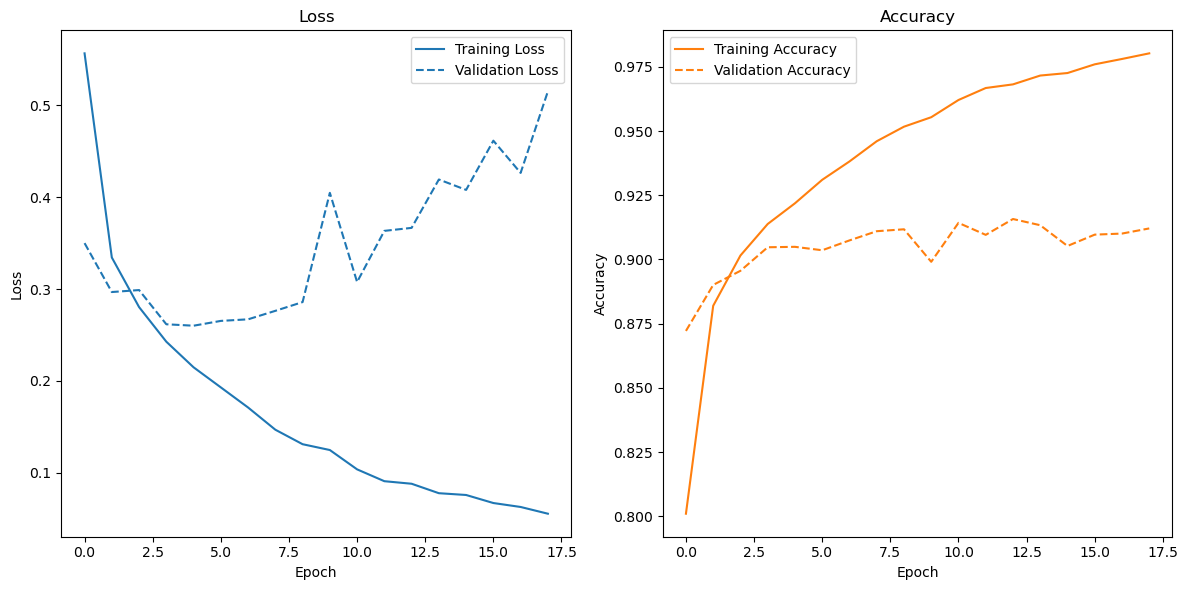

In [17]:
# Defining early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Training the model
history_7 = model_7.fit(X_train, y_train, epochs=25, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Plotting the loss and accuracy scores for the training and validation sets
plot_history(history_7)

The 7th model obtains an increased width: it consists of three dense layers with 512, 256, and 128 neurons respectively, all using the ReLU activation function. While the training loss is decreasing, the validation loss levels at earlier than the previous models, around the 2nd epoch. The EarlyStopping is triggered early on too, at the 13th epoch. This indicates that the model may be prone to overfitting the training data, as it quickly reaches its peak performance on the validation set and doesn't improve further with additional epochs. However, the increase in the validation loss suggests that the model may not generalize well to unseen data. The accuracy score is 0.96, while the validation accuracy is 90%.

### 8th model: Increased Depth and Width
---

In [18]:
# Setting the network
model_8 = Sequential([
    Rescaling(1./255, input_shape=(28, 28, 1)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    # Dense layers with 512 neurons, with relu activation
    Dense(512, activation='relu'),
    # Dropout layer of 0.5 to reduce overfitting
    Dropout(0.5),
    # Dense layer with 256 neurons, with relu activation
    Dense(256, activation='relu'),
    # Dropout layer of 0.5 to reduce overfitting
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compiling the third model
model_8.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_8.summary())

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_7 (Rescaling)              │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 512)                 │         819,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 972,426 (3.71 MB)

 Trainable params: 972,426 (3.71 MB)

 Non-trainable params: 0 (0.00 B)

None


Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 51s 31ms/step - accuracy: 0.7193 - loss: 0.7719 - val_accuracy: 0.8747 - val_loss: 0.3482
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 46s 31ms/step - accuracy: 0.8707 - loss: 0.3648 - val_accuracy: 0.8922 - val_loss: 0.2904
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 47s 31ms/step - accuracy: 0.8910 - loss: 0.3028 - val_accuracy: 0.8986 - val_loss: 0.2756
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 47s 31ms/step - accuracy: 0.9012 - loss: 0.2768 - val_accuracy: 0.9068 - val_loss: 0.2607
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 48s 32ms/step - accuracy: 0.9087 - loss: 0.2511 - val_accuracy: 0.9046 - val_loss: 0.2532
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 55s 37ms/step - accuracy: 0.9164 - loss: 0.2301 - val_accuracy: 0.9070 - val_loss: 0.2515
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 56s 38ms/step - accuracy: 0.9215 - loss: 0.2139 - val_accuracy: 0.9102 - val_loss: 0.2526
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.9241 -

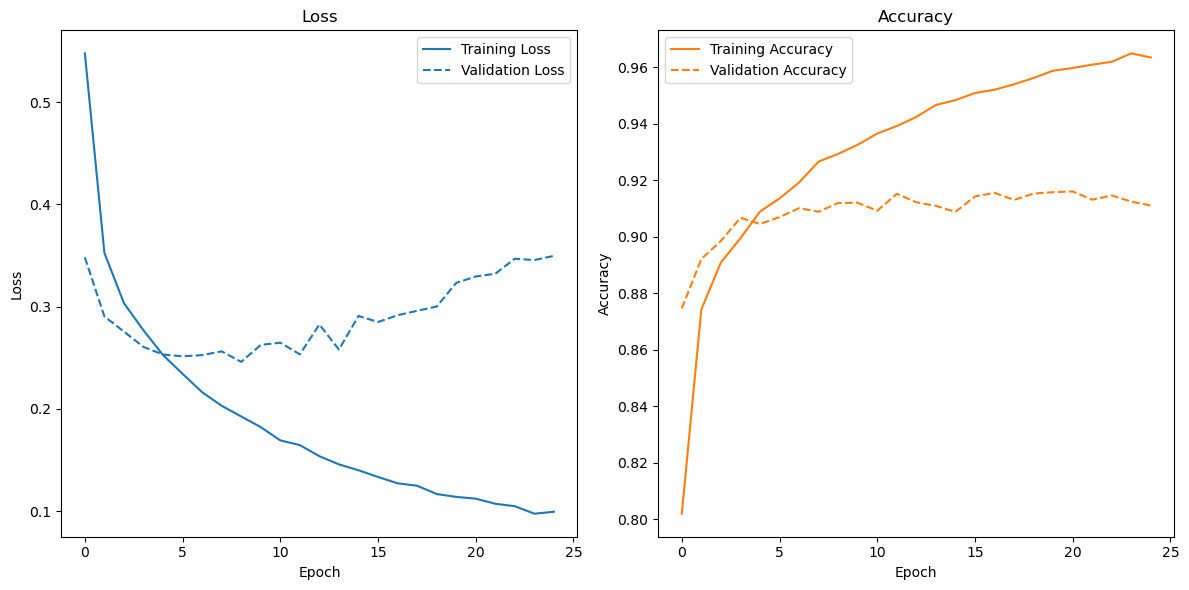

In [19]:
# Defining early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Training the model
history_8 = model_8.fit(X_train, y_train, epochs=25, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Plotting the loss and accuracy scores for the training and validation sets
plot_history(history_8)

Similary to the 7th model, the validation loss levels out at the fifth epoch and the EarlyStopping is activated at the 25th epoch.The training accuracy is lower than the 7th model's, however the validation accuracy is the same as the 6th model's, with a slight difference. In this model, the validation loss doesn't increase as much as in the other models, suggesting  that the model's generalization capability to unseen data might be slightly better compared to previous models, despite its lower training accuracy.

### *(Optional for 5 points) Try to use a pre-trained network to improve accuracy*

In [74]:
from skimage.transform import resize

# Resize images to 224x224
X_train_resized = np.array([resize(img, (224, 224)) for img in X_train])
X_val_resized = np.array([resize(img, (224, 224)) for img in X_val])
X_test_resized = np.array([resize(img, (224, 224)) for img in X_test])

C:\ProgramData\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


KeyboardInterrupt: 

In [73]:
# Train the model
history = model.fit(train_datagen.flow(X_train, y_train, batch_size=32), 
                    steps_per_epoch=len(X_train) / 32, 
                    epochs=10, 
                    validation_data=test_datagen.flow(X_val, y_val),
                    validation_steps=len(X_val) / 32)

# Loading the pre-trained VGG16 model without the top (classification) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(28, 28, 3))

# Add custom top layers for fashion classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
adam_optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=adam_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Data preprocessing (adjust as needed)
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

ValueError: Input data in `NumpyArrayIterator` should have rank 4. You passed an array with shape (48000, 28, 28)

### Select a final model and evaluate it on the test set. How does the test error compare to the validation error? (2 points) 

In [51]:
# Creating a list of the models
models = [model, model_2, model_3, model_4, model_5, model_6, model_7, model_8]

# Initalizing a list to store MSEs
mses = []

# Looping through each model
for i, model in enumerate(models):
    # Predicting the labels for the test set using the model
    y_pred = model.predict(X_test)
    
    # Calculating the mean squared error between the predicted and actual labels
    mse = mean_squared_error(y_test, y_pred)
    
    # Appending the MSE to the list
    mses.append(mse)

# Creating a DataFrame to store the MSE values
mse_df = pd.DataFrame({'Model': range(1, len(models)+1), 'MSE score': mses})

# Displaying the mse_df
print("\nMSE values for each model:")
mse_df

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step

MSE values for each model:


,Model,MSE score
0,1,0.014500
1,2,0.017221
2,3,0.016367
3,4,0.015797
4,5,0.016215
5,6,0.013220
6,7,0.014500
7,8,0.013787


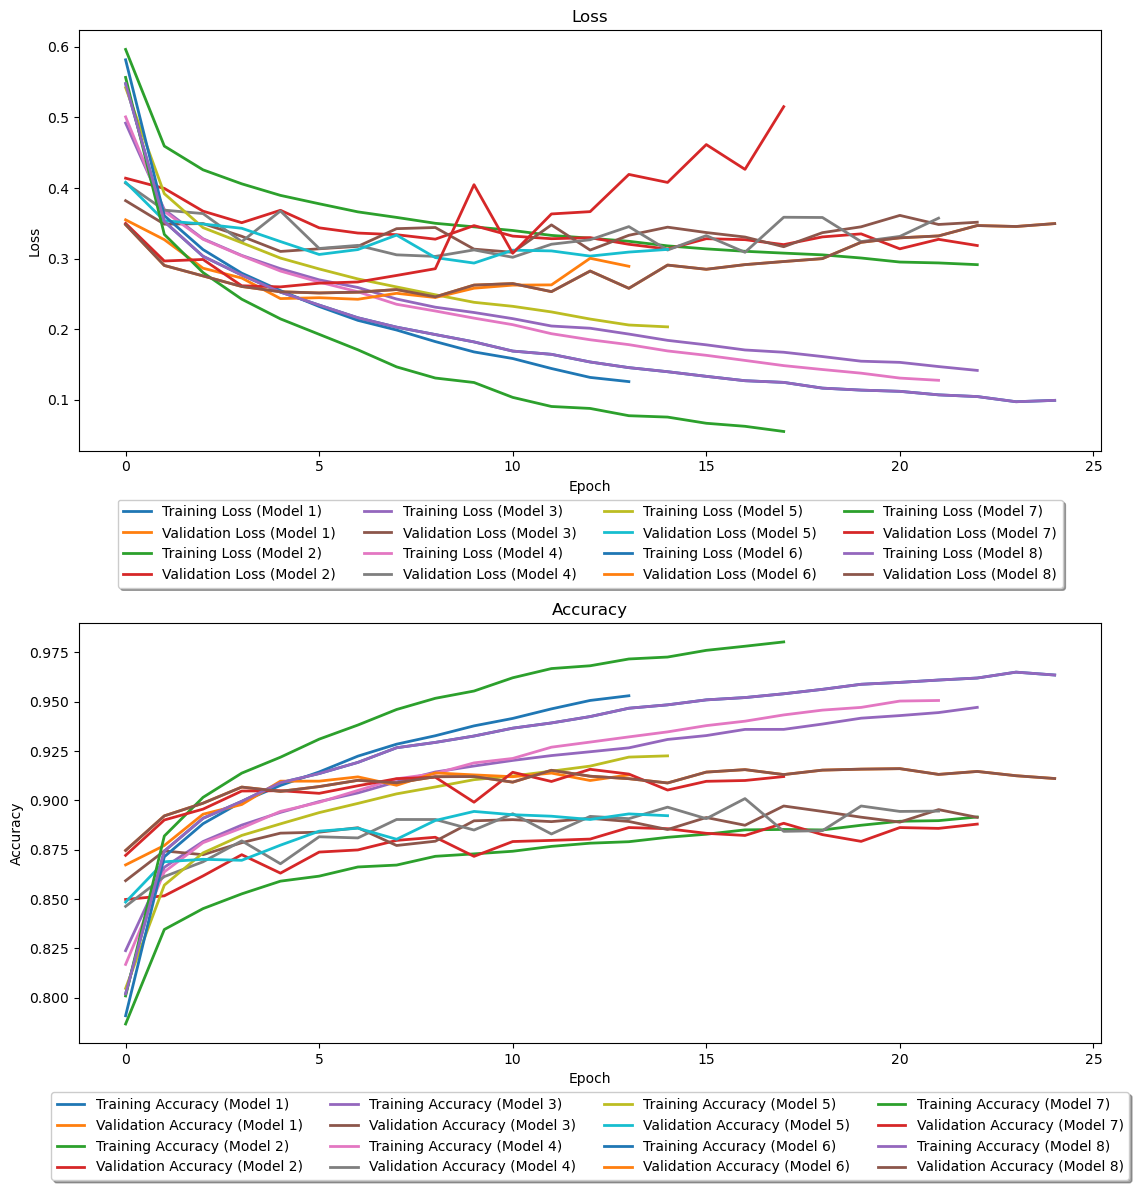

In [37]:
# Plot training and validation loss for each model
plt.figure(figsize=(12, 12))

# Plot training and validation loss
plt.subplot(2, 1, 1)
for i, history in enumerate([history, history_2, history_3, history_4, history_5, history_6, history_7, history_8]):
    plt.plot(history.history['loss'], label=f'Training Loss (Model {i+1})', linewidth=2.0)
    plt.plot(history.history['val_loss'], label=f'Validation Loss (Model {i+1})', linewidth=2.0)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=4)
plt.title('Loss')

# Plot training and validation accuracy
plt.subplot(2, 1, 2)
for i, history in enumerate([history, history_2, history_3, history_4, history_5, history_6, history_7, history_8]):
    plt.plot(history.history['accuracy'], label=f'Training Accuracy (Model {i+1})', linewidth=2.0)
    plt.plot(history.history['val_accuracy'], label=f'Validation Accuracy (Model {i+1})', linewidth=2.0)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=4)
plt.title('Accuracy')

plt.tight_layout()
plt.show()

In [56]:
# Initialize an empty list to store the last scores
last_scores_list = []

# Iterate over each model's history
for i, history in enumerate(all_histories, start=1):
    # Get the last scores from the history
    last_epoch = len(history.epoch) - 1
    last_scores_list.append({
        'Model': f'Model {i}',
        'Training Accuracy': history.history['accuracy'][last_epoch],
        'Training Loss': history.history['loss'][last_epoch],
        'Validation Accuracy': history.history['val_accuracy'][last_epoch],
        'Validation Loss': history.history['val_loss'][last_epoch]
    })

# Create a pandas DataFrame from the list
last_scores_df = pd.DataFrame(last_scores_list)

# Appending it the mse dataframe
merged_df = merged_df = pd.concat([last_scores_df, mse_df["MSE score"]], axis=1)
merged_df

,Model,Training Accuracy,Training Loss,Validation Accuracy,Validation Loss,MSE score
0,Model 1,0.963500,0.099421,0.911083,0.349717,0.014500
1,Model 2,0.891604,0.291568,0.888000,0.318648,0.017221
2,Model 3,0.947125,0.141826,0.891417,0.351637,0.016367
3,Model 4,0.950604,0.127819,0.894583,0.357412,0.015797
4,Model 5,0.922562,0.203487,0.892250,0.313131,0.016215
5,Model 6,0.953000,0.125975,0.912917,0.289264,0.013220
6,Model 7,0.980271,0.055361,0.912083,0.515267,0.014500
7,Model 8,0.963500,0.099421,0.911083,0.349717,0.013787


Model Performance: The table presents performance metrics for eight different models. These metrics include training accuracy, training loss, validation accuracy, validation loss, and mean squared error (MSE) score.

Training and Validation Metrics: Each model's training accuracy and training loss indicate how well the model performs on the training data, while validation accuracy and validation loss reflect its performance on unseen validation data.

Overfitting: Models with significantly lower training accuracy compared to validation accuracy, or much lower training loss compared to validation loss, may indicate overfitting, where the model learns to memorize the training data instead of generalizing well to unseen data.

Model Comparison: You can compare the models based on their performance metrics. For example, Model 7 has the highest training accuracy and lowest training loss, but its validation loss is relatively high compared to other models, suggesting potential overfitting.

MSE Score: The MSE score provides an additional perspective on model performance, specifically in regression tasks. Lower MSE scores indicate better performance in predicting continuous variables.

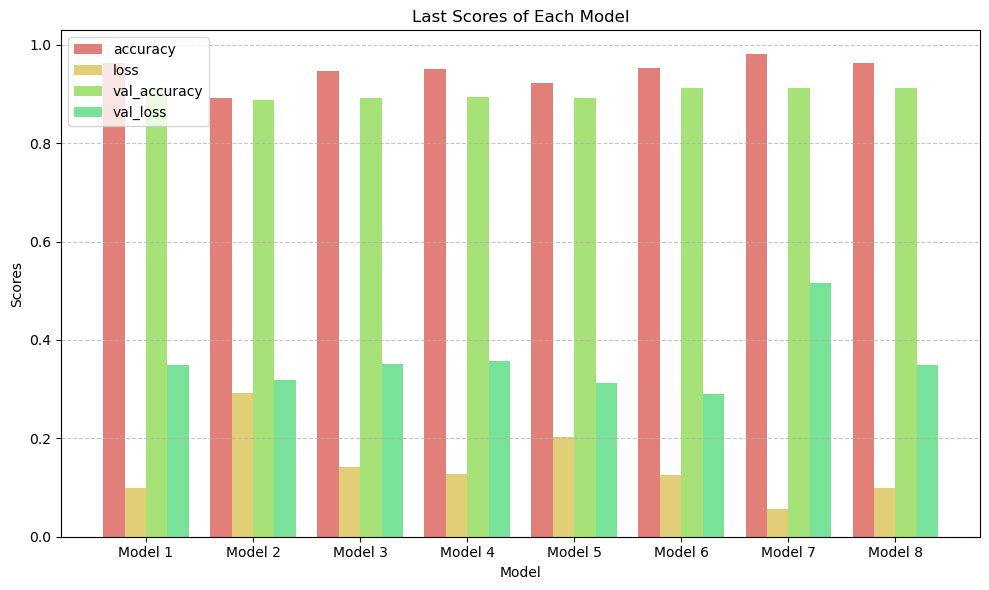

In [46]:
# Defining a list to store the histories of each model
all_histories = [history, history_2, history_3, history_4, history_5, history_6, history_7, history_8]

# Initializing an empty dictionary to store the last scores of each model
last_scores = {}

# Iterating over each model's history
for i, history in enumerate(all_histories, start=1):
    # Get the last scores from the history
    last_epoch = len(history.epoch) - 1
    last_scores[f'Model {i}'] = {
        'accuracy': history.history['accuracy'][last_epoch],
        'loss': history.history['loss'][last_epoch],
        'val_accuracy': history.history['val_accuracy'][last_epoch],
        'val_loss': history.history['val_loss'][last_epoch]
    }

# Plotting
plt.figure(figsize=(10, 6))
x = range(len(last_scores))
bar_width = 0.2
opacity = 0.8

metrics = ['accuracy', 'loss', 'val_accuracy', 'val_loss']
colors = sns.color_palette("hls", 8)

for i, (metric, color) in enumerate(zip(metrics, colors)):
    plt.bar([pos + i * bar_width for pos in x], [last_scores[model][metric] for model in last_scores], bar_width,
            alpha=opacity, color=color, label=metric)

plt.xlabel('Model')
plt.ylabel('Scores')
plt.title('Last Scores of Each Model')
plt.xticks([pos + 1.5 * bar_width for pos in x], last_scores.keys())
plt.legend(loc='upper left')

# Add grids
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()